### COURSERA ML WEEK 2 PROGRAMMING ASSIGNMENT FOR UNIVARIATE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('ex1data1.txt', names= ['Population', 'Profit'])

In [3]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


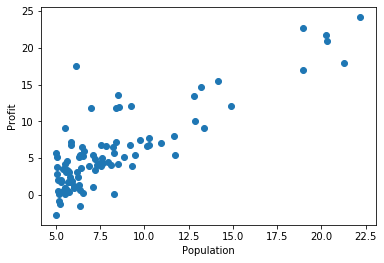

In [5]:
plt.scatter(df['Population'], df['Profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [21]:
iterations = 1500
alpha = 0.01
m = len(df)
theta = np.zeros((2,1))
X = np.hstack((np.ones((m,1)), df.Population.values.reshape(m,1)))
y = df.Profit.values.reshape((m,1))

In [55]:
def cost_function(theta, X, y):
    y_pred = np.dot(X,theta)
    error = (y_pred - y)**2
    return 1/(2*m)*np.sum(error)

In [56]:
J = cost_function(theta, X, y)
J

24.851360871691725

In [24]:
def gradient_descent(theta, X, y , alpha, iterations):
    costs = []
    for _ in range(iterations):
        y_pred = np.dot(X,theta) - y
        error = np.dot(X.transpose(), y_pred)
        theta -= alpha* 1/m * error
        costs.append(cost_function(theta, X, y))
    return theta, costs 

In [26]:
theta, costs = gradient_descent(theta, X, y, alpha, iterations)

In [27]:
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0],2))))

h(x) = -3.63 + 1.17x1


In [28]:
y = np.dot([1, 3.5] , theta)

In [30]:
# Optimized cost funtion after gradient descent:
J = cost_function(theta, X, y)
J

24.851360871691725

#### Plotting the COST FUNCTIONS to Verify our Gradient Descent Algorithm:

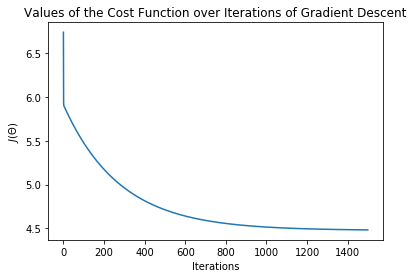

In [31]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title("Values of the Cost Function over Iterations of Gradient Descent")
plt.show()

In [37]:
theta = np.squeeze(theta)
theta

array([-3.63029144,  1.16636235])

In [41]:
x_values = [x for x in range(5, 25)]
y_values = [(x*theta[1] + theta[0]) for x in x_values ]

### Plotting LINEAR REGRESSION FIT:

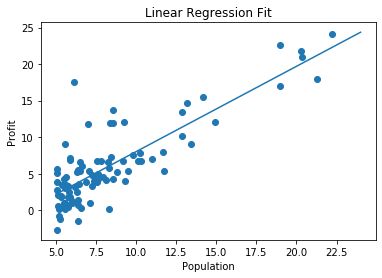

In [42]:
plt.scatter(df['Population'], df['Profit'])
sns.lineplot(x_values, y_values)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression Fit');

### Predicting Based on our Algorithm:

In [44]:
predict1 = np.dot(np.array([1,3.5]), theta)

In [52]:
print("for a population of 35K the profit is predicted to be", round((predict1*10000),2))

for a population of 35K the profit is predicted to be 4519.77


In [53]:
predict2 = np.dot(np.array([1, 7]), theta)

In [54]:
print("for a population of 70K the profit is predicted to be", round((predict2*10000),2))

for a population of 70K the profit is predicted to be 45342.45
